In [41]:
!pip install praw
!pip install yfinance
!pip install vaderSentiment
!pip install matplotlib
!pip install pandas
!pip install scikit-learn



In [58]:
import praw
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

client_id = 'v7C0oPpsPjVKOsptqEkaAA'
client_secret = 'fBY3xKcWRZlAH3sBYR0oVcbgg0e9aQ'
user_agent = 'my_reddit_app/0.1 by Weary_Ad_1647'

# Authenticate with the Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)


In [68]:
# Access the WallStreetBets subreddit
subreddit = reddit.subreddit('wallstreetbets')

# Define the number of posts to retrieve
num_posts = 100

# Fetch the top posts
top_posts = subreddit.top(limit=num_posts)

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Create a list to hold the post data
posts_data = []

# Process the posts
for post in top_posts:
    posts_data.append({
        'title': post.title,
        'score': post.score,
        'created_utc': post.created_utc,
        'sentiment': analyzer.polarity_scores(post.title)['compound']
    })




In [80]:
# Convert the list to a pandas DataFrame
df_sentiment = pd.DataFrame(posts_data)

In [81]:
# Display the DataFrame columns to ensure 'created_utc' is included
print(df_sentiment.columns)

Index(['title', 'score', 'created_utc', 'sentiment'], dtype='object')


In [82]:
# Convert created_utc to datetime
df_sentiment['created_utc'] = pd.to_datetime(df_sentiment['created_utc'], unit='s')

In [83]:
# Set created_utc as index
df_sentiment.set_index('created_utc', inplace=True)

In [84]:
# Resample sentiment data to daily sentiment
daily_sentiment = df_sentiment['sentiment'].resample('D').mean()

In [85]:
# Display the sentiment data
print(daily_sentiment.head())

created_utc
2021-01-26    0.427800
2021-01-27    0.213900
2021-01-28   -0.009871
2021-01-29    0.271583
2021-01-30    0.274982
Freq: D, Name: sentiment, dtype: float64


In [ ]:
print(f'url: {post.url}')

url: https://www.insider.com/wallstreetbets-reddit-bans-moderators-gamestop-started-movie-deal-coup-2021-2


In [75]:
# Fetch historical stock prices for a specific stock (e.g., GME)
ticker = 'GME'
stock = yf.Ticker(ticker)
stock_data = stock.history(period='5y')  # Fetch 5 years of data

In [76]:
# Calculate moving averages
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

In [77]:
# Calculate trading volume changes
stock_data['Volume_Change'] = stock_data['Volume'].pct_change()

In [78]:
# Calculate daily returns
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

In [79]:
# Drop NaN values
stock_data.dropna(inplace=True)

In [88]:
# Check the index of both DataFrames
print(stock_data.index)
print(daily_sentiment.index)

# Ensure the index is datetime for both DataFrames
stock_data.index = pd.to_datetime(stock_data.index)
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

# Resample `stock_data` to daily frequency if needed
stock_data = stock_data.resample('D').ffill()


DatetimeIndex(['2019-08-19 00:00:00-04:00', '2019-08-20 00:00:00-04:00',
               '2019-08-21 00:00:00-04:00', '2019-08-22 00:00:00-04:00',
               '2019-08-23 00:00:00-04:00', '2019-08-26 00:00:00-04:00',
               '2019-08-27 00:00:00-04:00', '2019-08-28 00:00:00-04:00',
               '2019-08-29 00:00:00-04:00', '2019-08-30 00:00:00-04:00',
               ...
               '2024-05-24 00:00:00-04:00', '2024-05-28 00:00:00-04:00',
               '2024-05-29 00:00:00-04:00', '2024-05-30 00:00:00-04:00',
               '2024-05-31 00:00:00-04:00', '2024-06-03 00:00:00-04:00',
               '2024-06-04 00:00:00-04:00', '2024-06-05 00:00:00-04:00',
               '2024-06-06 00:00:00-04:00', '2024-06-07 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1210, freq=None)
DatetimeIndex(['2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02',
               

In [93]:
# Drop any rows with missing values after the join
stock_data.dropna(inplace=True)

# Display the combined data
print(stock_data.head())


                             Open    High    Low   Close     Volume  \
Date                                                                  
2019-08-19 00:00:00-04:00  0.8425  0.8675  0.835  0.8450   11550000   
2019-08-20 00:00:00-04:00  0.8375  0.8650  0.820  0.8550   17040000   
2019-08-21 00:00:00-04:00  0.8750  0.9050  0.860  0.8850   23643600   
2019-08-22 00:00:00-04:00  0.9925  1.0625  0.930  0.9675  116709200   
2019-08-23 00:00:00-04:00  0.9600  0.9750  0.890  0.9125   34643600   

                           Dividends  Stock Splits      MA20     MA50  \
Date                                                                    
2019-08-19 00:00:00-04:00        0.0           0.0  0.937125  1.15975   
2019-08-20 00:00:00-04:00        0.0           0.0  0.928750  1.14965   
2019-08-21 00:00:00-04:00        0.0           0.0  0.922000  1.13875   
2019-08-22 00:00:00-04:00        0.0           0.0  0.920625  1.13060   
2019-08-23 00:00:00-04:00        0.0           0.0  0.916125  1.

In [95]:
# Define the feature set and target variable
features = ['MA20', 'MA50', 'Volume_Change', 'Daily_Return', 'sentiment']
target = 'Close'




In [99]:
# Print the head of daily_sentiment to verify the presence of 'sentiment' column
print(daily_sentiment.head())




created_utc
2021-01-26    0.427800
2021-01-27    0.213900
2021-01-28   -0.009871
2021-01-29    0.271583
2021-01-30    0.274982
Freq: D, Name: sentiment, dtype: float64


In [104]:
# Step 1: Define daily_sentiment
# Assuming df_sentiment is your sentiment DataFrame
if 'created_utc' in df_sentiment.columns:
    if df_sentiment['created_utc'].dtype != 'datetime64[ns]':
        df_sentiment['created_utc'] = pd.to_datetime(df_sentiment['created_utc'])

    df_sentiment.set_index('created_utc', inplace=True)

    daily_sentiment = df_sentiment.resample('D').mean()
    
    # Ensure daily_sentiment is a DataFrame
    if isinstance(daily_sentiment, pd.Series):
        daily_sentiment = daily_sentiment.to_frame(name='sentiment')

    print(daily_sentiment.head())
    print(daily_sentiment.columns)
else:
    print("Column 'created_utc' not found in the DataFrame.")

Column 'created_utc' not found in the DataFrame.


In [106]:
# Drop any rows with missing values
stock_data.dropna(inplace=True)

In [107]:
print(stock_data.head())

                             Open    High    Low   Close     Volume  \
Date                                                                  
2019-08-19 00:00:00-04:00  0.8425  0.8675  0.835  0.8450   11550000   
2019-08-20 00:00:00-04:00  0.8375  0.8650  0.820  0.8550   17040000   
2019-08-21 00:00:00-04:00  0.8750  0.9050  0.860  0.8850   23643600   
2019-08-22 00:00:00-04:00  0.9925  1.0625  0.930  0.9675  116709200   
2019-08-23 00:00:00-04:00  0.9600  0.9750  0.890  0.9125   34643600   

                           Dividends  Stock Splits      MA20     MA50  \
Date                                                                    
2019-08-19 00:00:00-04:00        0.0           0.0  0.937125  1.15975   
2019-08-20 00:00:00-04:00        0.0           0.0  0.928750  1.14965   
2019-08-21 00:00:00-04:00        0.0           0.0  0.922000  1.13875   
2019-08-22 00:00:00-04:00        0.0           0.0  0.920625  1.13060   
2019-08-23 00:00:00-04:00        0.0           0.0  0.916125  1.

In [108]:
print(stock_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'MA20', 'MA50', 'Volume_Change', 'Daily_Return'],
      dtype='object')


In [109]:
# Ensure the index is datetime for both DataFrames
stock_data.index = pd.to_datetime(stock_data.index)
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

In [110]:
# Resample `stock_data` to daily frequency if needed
stock_data = stock_data.resample('D').ffill()

In [111]:
# Print the indices of both DataFrames to check alignment
print(stock_data.index)
print(daily_sentiment.index)

DatetimeIndex(['2019-08-19 00:00:00-04:00', '2019-08-20 00:00:00-04:00',
               '2019-08-21 00:00:00-04:00', '2019-08-22 00:00:00-04:00',
               '2019-08-23 00:00:00-04:00', '2019-08-24 00:00:00-04:00',
               '2019-08-25 00:00:00-04:00', '2019-08-26 00:00:00-04:00',
               '2019-08-27 00:00:00-04:00', '2019-08-28 00:00:00-04:00',
               ...
               '2024-05-29 00:00:00-04:00', '2024-05-30 00:00:00-04:00',
               '2024-05-31 00:00:00-04:00', '2024-06-01 00:00:00-04:00',
               '2024-06-02 00:00:00-04:00', '2024-06-03 00:00:00-04:00',
               '2024-06-04 00:00:00-04:00', '2024-06-05 00:00:00-04:00',
               '2024-06-06 00:00:00-04:00', '2024-06-07 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=1755, freq='D')
DatetimeIndex(['2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31', '2021-02-01', '2021-02-02',
               '

In [125]:
# Join stock data with daily sentiment data
stock_data = stock_data.join(daily_sentiment['sentiment'], how='inner')

TypeError: Cannot join tz-naive with tz-aware DatetimeIndex

In [113]:
daily_sentiment

created_utc
2021-01-26    0.427800
2021-01-27    0.213900
2021-01-28   -0.009871
2021-01-29    0.271583
2021-01-30    0.274982
                ...   
2022-11-07         NaN
2022-11-08         NaN
2022-11-09         NaN
2022-11-10         NaN
2022-11-11    0.136300
Freq: D, Name: sentiment, Length: 655, dtype: float64

In [116]:
stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA20,MA50,Volume_Change,Daily_Return
Date,,,,,,,,,,,
2019-08-19 00:00:00-04:00,0.842500,0.8675,0.835000,0.845000,11550000,0.0,0.0,0.937125,1.15975,-0.077682,0.018072
2019-08-20 00:00:00-04:00,0.837500,0.8650,0.820000,0.855000,17040000,0.0,0.0,0.928750,1.14965,0.475325,0.011834
2019-08-21 00:00:00-04:00,0.875000,0.9050,0.860000,0.885000,23643600,0.0,0.0,0.922000,1.13875,0.387535,0.035088
2019-08-22 00:00:00-04:00,0.992500,1.0625,0.930000,0.967500,116709200,0.0,0.0,0.920625,1.13060,3.936186,0.093220
2019-08-23 00:00:00-04:00,0.960000,0.9750,0.890000,0.912500,34643600,0.0,0.0,0.916125,1.12035,-0.703163,-0.056847
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03 00:00:00-04:00,40.189999,40.5000,26.400000,28.000000,165808300,0.0,0.0,23.755500,16.49780,6.477499,0.210026
2024-06-04 00:00:00-04:00,26.260000,28.0100,25.200001,26.500000,51662100,0.0,0.0,24.265000,16.76580,-0.688423,-0.053571
2024-06-05 00:00:00-04:00,26.299999,31.8400,26.110001,31.570000,73156400,0.0,0.0,25.028000,17.09480,0.416055,0.191321


In [122]:
#Assuming df_sentiment is your sentiment DataFrame
if 'created_utc' in df_sentiment.columns:
    if df_sentiment['created_utc'].dtype != 'datetime64[ns]':
        df_sentiment['created_utc'] = pd.to_datetime(df_sentiment['created_utc'])

    df_sentiment.set_index('created_utc', inplace=True)

    # Resample and ensure daily_sentiment is a DataFrame with a proper index
    daily_sentiment = df_sentiment.resample('D').mean()
    
    # If daily_sentiment is a Series, convert it to a DataFrame
    if isinstance(daily_sentiment, pd.Series):
        daily_sentiment = daily_sentiment.to_frame(name='sentiment')

    # Display the content of daily_sentiment
    print(daily_sentiment.head())
    print(daily_sentiment.info())
    print(daily_sentiment.columns)
    print(type(daily_sentiment))
else:
    print("Column 'created_utc' not found in the DataFrame.")





Column 'created_utc' not found in the DataFrame.


In [123]:
   # If daily_sentiment is a Series, convert it to a DataFrame
if isinstance(daily_sentiment, pd.Series):
        daily_sentiment = daily_sentiment.to_frame(name='sentiment')




In [128]:
import pandas as pd
import yfinance as yf

# Assuming df_sentiment is your sentiment DataFrame
if 'created_utc' in df_sentiment.columns:
    if df_sentiment['created_utc'].dtype != 'datetime64[ns]':
        df_sentiment['created_utc'] = pd.to_datetime(df_sentiment['created_utc'])

    df_sentiment.set_index('created_utc', inplace=True)

    # Resample and ensure daily_sentiment is a DataFrame with a proper index
    daily_sentiment = df_sentiment.resample('D').mean()
    
    # If daily_sentiment is a Series, convert it to a DataFrame
    if isinstance(daily_sentiment, pd.Series):
        daily_sentiment = daily_sentiment.to_frame(name='sentiment')

    # Ensure 'sentiment' column exists
    if 'sentiment' not in daily_sentiment.columns:
        daily_sentiment['sentiment'] = df_sentiment['sentiment']

    # Display the content of daily_sentiment
    print(daily_sentiment.head())
    print(daily_sentiment.info())
    print(daily_sentiment.columns)
    print(type(daily_sentiment))
else:
    print("Column 'created_utc' not found in the DataFrame.")

# Fetch stock price data
ticker = 'GME'
stock = yf.Ticker(ticker)
stock_data = stock.history(period='5y')

# Calculate additional stock data features
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Volume_Change'] = stock_data['Volume'].pct_change()
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Drop any rows with missing values
stock_data.dropna(inplace=True)

print(stock_data.head())
print(stock_data.info())
print(stock_data.columns)

# Ensure the index is datetime for both DataFrames
stock_data.index = pd.to_datetime(stock_data.index)
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

# Print the indices of both DataFrames to check alignment
print(stock_data.index)
print(daily_sentiment.index)

# Join stock data with daily sentiment data
stock_data = stock_data.join(daily_sentiment, how='inner')

# Print the columns of stock_data after the join
print(stock_data.columns)

# Drop any rows with missing values after the join
stock_data.dropna(inplace=True)

# Display the combined data
print(stock_data.head())
print(stock_data.info())
print(stock_data.columns)


Column 'created_utc' not found in the DataFrame.
                             Open    High    Low   Close     Volume  \
Date                                                                  
2019-08-19 00:00:00-04:00  0.8425  0.8675  0.835  0.8450   11550000   
2019-08-20 00:00:00-04:00  0.8375  0.8650  0.820  0.8550   17040000   
2019-08-21 00:00:00-04:00  0.8750  0.9050  0.860  0.8850   23643600   
2019-08-22 00:00:00-04:00  0.9925  1.0625  0.930  0.9675  116709200   
2019-08-23 00:00:00-04:00  0.9600  0.9750  0.890  0.9125   34643600   

                           Dividends  Stock Splits      MA20     MA50  \
Date                                                                    
2019-08-19 00:00:00-04:00        0.0           0.0  0.937125  1.15975   
2019-08-20 00:00:00-04:00        0.0           0.0  0.928750  1.14965   
2019-08-21 00:00:00-04:00        0.0           0.0  0.922000  1.13875   
2019-08-22 00:00:00-04:00        0.0           0.0  0.920625  1.13060   
2019-08-23 00:0

TypeError: Cannot join tz-naive with tz-aware DatetimeIndex

In [129]:
import pandas as pd
import yfinance as yf

# Assuming df_sentiment is your sentiment DataFrame
if 'created_utc' in df_sentiment.columns:
    if df_sentiment['created_utc'].dtype != 'datetime64[ns]':
        df_sentiment['created_utc'] = pd.to_datetime(df_sentiment['created_utc'])

    df_sentiment.set_index('created_utc', inplace=True)

    # Resample and ensure daily_sentiment is a DataFrame with a proper index
    daily_sentiment = df_sentiment.resample('D').mean()
    
    # If daily_sentiment is a Series, convert it to a DataFrame
    if isinstance(daily_sentiment, pd.Series):
        daily_sentiment = daily_sentiment.to_frame(name='sentiment')

    # Ensure 'sentiment' column exists
    if 'sentiment' not in daily_sentiment.columns:
        daily_sentiment['sentiment'] = df_sentiment['sentiment']

    # Display the content of daily_sentiment
    print(daily_sentiment.head())
    print(daily_sentiment.info())
    print(daily_sentiment.columns)
    print(type(daily_sentiment))
else:
    print("Column 'created_utc' not found in the DataFrame.")

# Fetch stock price data
ticker = 'GME'
stock = yf.Ticker(ticker)
stock_data = stock.history(period='5y')

# Calculate additional stock data features
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Volume_Change'] = stock_data['Volume'].pct_change()
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Drop any rows with missing values
stock_data.dropna(inplace=True)

print(stock_data.head())
print(stock_data.info())
print(stock_data.columns)

# Ensure the index is datetime for both DataFrames and make them tz-naive
stock_data.index = pd.to_datetime(stock_data.index).tz_localize(None)
daily_sentiment.index = pd.to_datetime(daily_sentiment.index).tz_localize(None)

# Print the indices to check alignment
print(stock_data.index)
print(daily_sentiment.index)

# Join stock data with daily sentiment data
stock_data = stock_data.join(daily_sentiment, how='inner')

# Print the columns of stock_data after the join
print(stock_data.columns)

# Drop any rows with missing values after the join
stock_data.dropna(inplace=True)

# Display the combined data
print(stock_data.head())
print(stock_data.info())
print(stock_data.columns)


Column 'created_utc' not found in the DataFrame.
                             Open    High    Low   Close     Volume  \
Date                                                                  
2019-08-19 00:00:00-04:00  0.8425  0.8675  0.835  0.8450   11550000   
2019-08-20 00:00:00-04:00  0.8375  0.8650  0.820  0.8550   17040000   
2019-08-21 00:00:00-04:00  0.8750  0.9050  0.860  0.8850   23643600   
2019-08-22 00:00:00-04:00  0.9925  1.0625  0.930  0.9675  116709200   
2019-08-23 00:00:00-04:00  0.9600  0.9750  0.890  0.9125   34643600   

                           Dividends  Stock Splits      MA20     MA50  \
Date                                                                    
2019-08-19 00:00:00-04:00        0.0           0.0  0.937125  1.15975   
2019-08-20 00:00:00-04:00        0.0           0.0  0.928750  1.14965   
2019-08-21 00:00:00-04:00        0.0           0.0  0.922000  1.13875   
2019-08-22 00:00:00-04:00        0.0           0.0  0.920625  1.13060   
2019-08-23 00:0

In [131]:
# Define the feature set and target variable
features = ['MA20', 'MA50', 'Volume_Change', 'Daily_Return', 'sentiment']
target = 'Close'

X = stock_data[features]
y = stock_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


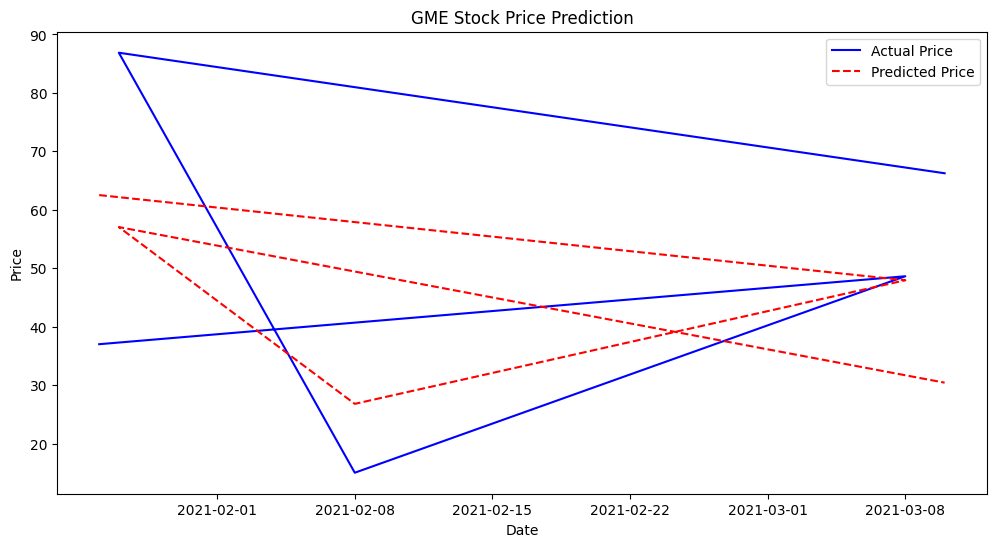

In [132]:
# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.show()


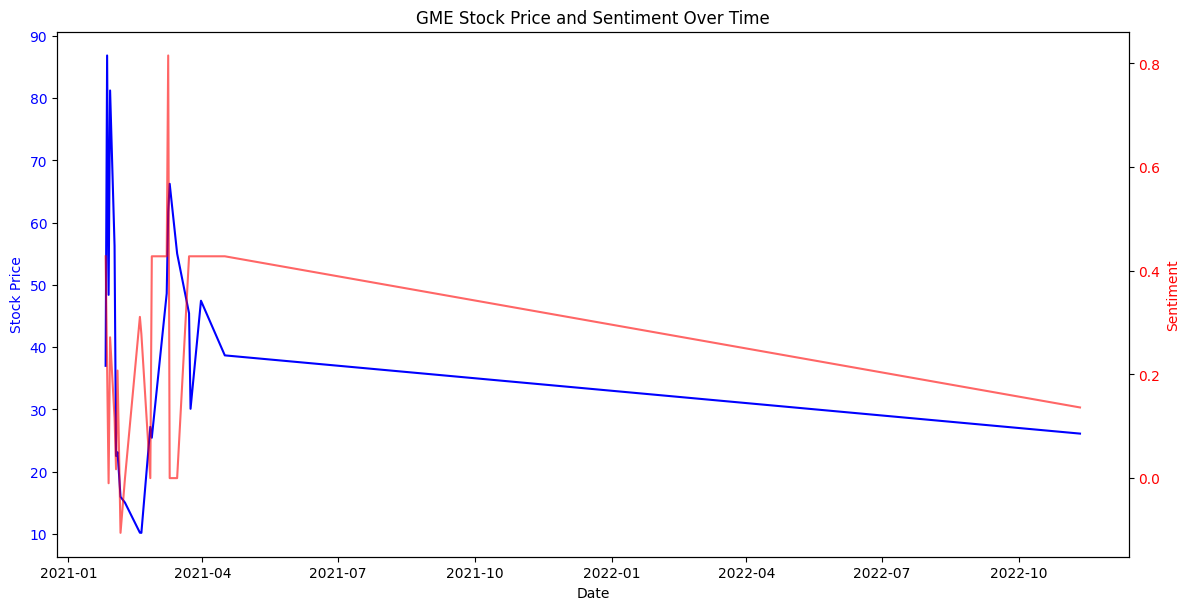

In [133]:
# Plot sentiment and stock prices
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.plot(stock_data.index, stock_data['Close'], color='blue', label='Stock Price')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment', color='red')
ax2.plot(stock_data.index, stock_data['sentiment'], color='red', label='Sentiment', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()
plt.title(f'{ticker} Stock Price and Sentiment Over Time')
plt.show()


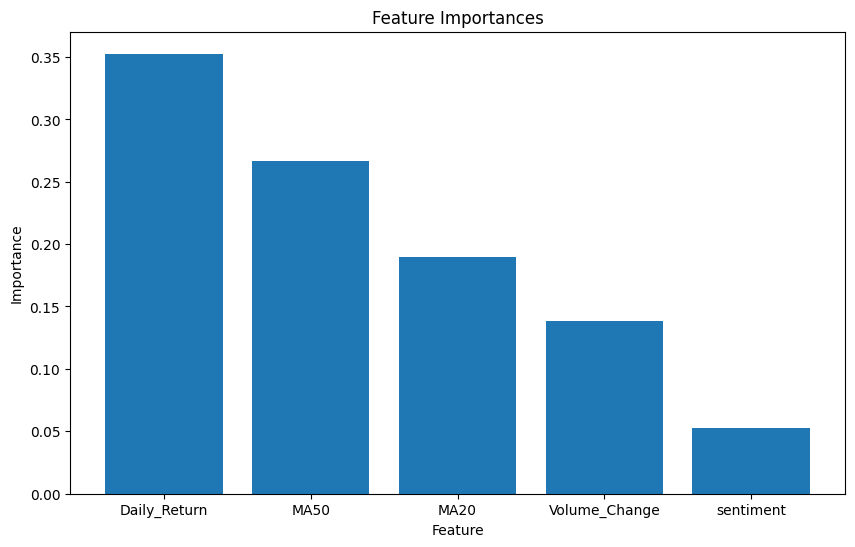

In [134]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()
